<a href="https://colab.research.google.com/github/koushik200207/Yes-Bank-Stock-Pricing-Prediction---Regression/blob/main/Yes_Bank_Stock_Pricing_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To predict the stock’s closing price of the month.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer


### Dataset Loading

In [ ]:
# Load Dataset

df = pd.read_csv('data_YesBank_StockPrices.csv')
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


<Axes: >

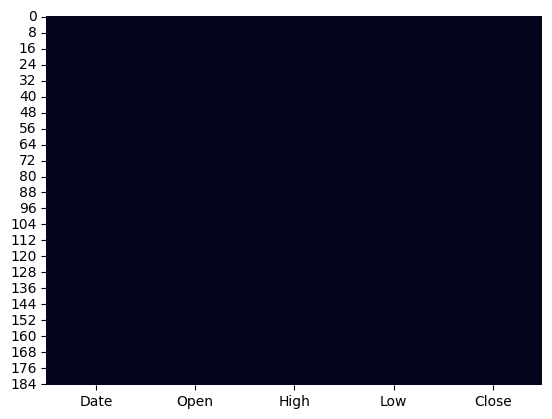

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The datset has 185 rows and 5 columns. It has no duplicate and no null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description


*   Date : Date of record
*   Open : Opening Price
*   High : Highest Price in the month
*   Low  : Lowest Price in the month
*   Close : Closing Price





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Converting date from object to datetime

df = df.copy()

df['Date'] = pd.to_datetime(df['Date'], format = '%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
# Extracting the month from the 'Date' column

df['Month'] = df['Date'].dt.month
df.head(10)

,Date,Open,High,Low,Close,Month
0,2005-07-01,13.00,14.00,11.25,12.46,7
1,2005-08-01,12.58,14.88,12.55,13.42,8
2,2005-09-01,13.48,14.87,12.27,13.30,9
3,2005-10-01,13.20,14.47,12.40,12.99,10
4,2005-11-01,13.35,13.88,12.88,13.41,11
5,2005-12-01,13.49,14.44,13.00,13.71,12
6,2006-01-01,13.68,17.16,13.58,15.33,1
7,2006-02-01,15.50,16.97,15.40,16.12,2
8,2006-03-01,16.20,20.95,16.02,20.08,3
9,2006-04-01,20.56,20.80,18.02,19.49,4


In [ ]:
# Extracting the year from the 'Date' column

df['Year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [ ]:
# Extracting the month and year as a period

df['Month_Year'] = df['Date'].dt.to_period('M')
df.head(10)

,Date,Open,High,Low,Close,Month,Year,Month_Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005,2005-07
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005,2005-08
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005,2005-09
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005,2005-10
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005,2005-11
5,2005-12-01,13.49,14.44,13.00,13.71,12,2005,2005-12
6,2006-01-01,13.68,17.16,13.58,15.33,1,2006,2006-01
7,2006-02-01,15.50,16.97,15.40,16.12,2,2006,2006-02
8,2006-03-01,16.20,20.95,16.02,20.08,3,2006,2006-03
9,2006-04-01,20.56,20.80,18.02,19.49,4,2006,2006-04


In [ ]:
# Checking the number of unique months

print(f'There are {df["Month_Year"].nunique()} unique months in the dataset.')

# Checking if consecutive entries have different month-year periods

print((df['Month_Year'] != df['Month_Year'].shift(1)).all())

There are 185 unique months in the dataset.
True


In [ ]:
# Calculating moving averages over monthly periods

# 3 months moving average

df['3_Month_MA'] = df['Close'].rolling(window=3).mean()

# 6 months moving average

df['6_Month_MA'] = df['Close'].rolling(window=6).mean()

# 12 months moving average

df['12_Month_MA'] = df['Close'].rolling(window=12).mean()

df.head(20)

,Date,Open,High,Low,Close,Month,Year,Month_Year,3_Month_MA,6_Month_MA,12_Month_MA
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005,2005-07,NaN,NaN,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005,2005-08,NaN,NaN,NaN
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005,2005-09,13.060000,NaN,NaN
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005,2005-10,13.236667,NaN,NaN
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005,2005-11,13.233333,NaN,NaN
5,2005-12-01,13.49,14.44,13.00,13.71,12,2005,2005-12,13.370000,13.215000,NaN
6,2006-01-01,13.68,17.16,13.58,15.33,1,2006,2006-01,14.150000,13.693333,NaN
7,2006-02-01,15.50,16.97,15.40,16.12,2,2006,2006-02,15.053333,14.143333,NaN
8,2006-03-01,16.20,20.95,16.02,20.08,3,2006,2006-03,17.176667,15.273333,NaN
9,2006-04-01,20.56,20.80,18.02,19.49,4,2006,2006-04,18.563333,16.356667,NaN


In [ ]:
# Correlation between close of month n and open of month n+1

# we need to shift the 'Open' column by one period (one month in this case).

df['Next_Month_Open'] = df['Open'].shift(-1)

# Drop the last row as it will have a NaN for 'Next_Month_Open'

correlation_df = df.dropna(subset = ['Next_Month_Open']).copy()

# Calculate the correlation
correlation = correlation_df['Close'].corr(correlation_df['Next_Month_Open'])

print(f'The correlation between close of month n and open of month n+1 is {correlation}.')


The correlation between close of month n and open of month n+1 is 0.9999491555808057.


In [ ]:
# Filtering numerical columns

numerical_df = df[['Open', 'High', 'Low', 'Close', 'Next_Month_Open']]
numerical_df

,Open,High,Low,Close,Next_Month_Open
0,13.00,14.00,11.25,12.46,12.58
1,12.58,14.88,12.55,13.42,13.48
2,13.48,14.87,12.27,13.30,13.20
3,13.20,14.47,12.40,12.99,13.35
4,13.35,13.88,12.88,13.41,13.49
...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,12.00
181,12.00,17.16,11.85,14.37,14.30
182,14.30,15.34,12.75,13.15,13.30
183,13.30,14.01,12.11,12.42,12.41


### What all manipulations have you done and insights you found?

 The column date is of object type in the original data, so i have converted that into datetime type and extracted month, year and month-year periods. I have calculated moving averages for 3 month, 6 month and 12 month period. i have checked the correlation between close price of (n)th day and open price of the (n+1)th day and found highly postive correlation of 0.999.  

 Based on this high positive correlation (close to 1) :

*    There is a very strong positive linear relationship. The current month's closing price is a strong predictor of the next month's opening price.
*    It indicates significant continuity in price levels between monthly trading periods.
*    There is likely minimal "gap risk" between monthly close and next month's opening price.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

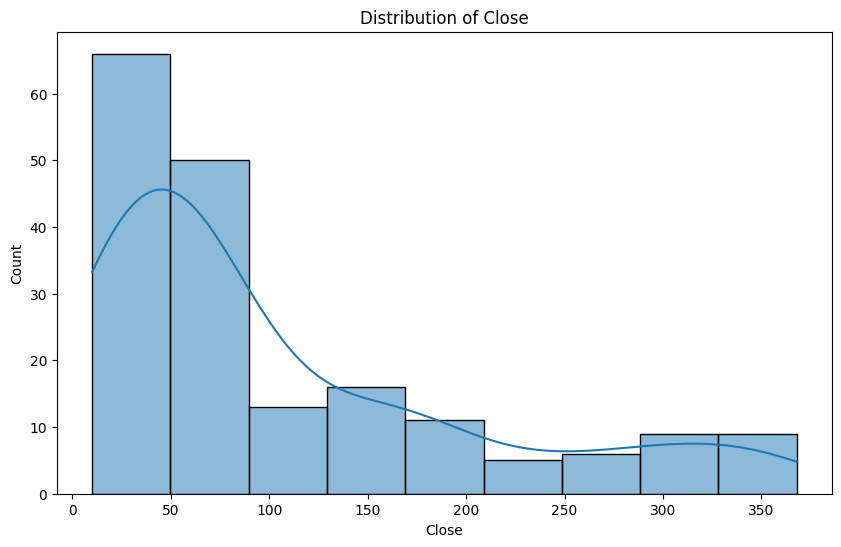

In [ ]:
# Plot for distribution of close - Univariate Analysis

plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Close')
plt.show()

##### 1. Why did you pick the specific chart?


*   Selecting a hist plot with a KDE overlay to visualize the frequency and pattern of the "Close" stock prices over the dataset.
*   This helps understand whether the values are skewed, normally distributed, or contain outliers.



##### 2. What is/are the insight(s) found from the chart?



*   The distribution is right-skewed: majority of stock prices lie in the lower range (10–100).

*   Very few instances where the stock price was high (200–350+).

*   Implies a decline over time, aligning with Yes Bank’s known financial instability post-2018.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   From the insight found we can see the data is right skewed and helps us to transform the data before building the model.
*   Internal stakeholders may correlate these trends with key business or governance events, enabling data-driven decision making.



#### Chart - 2

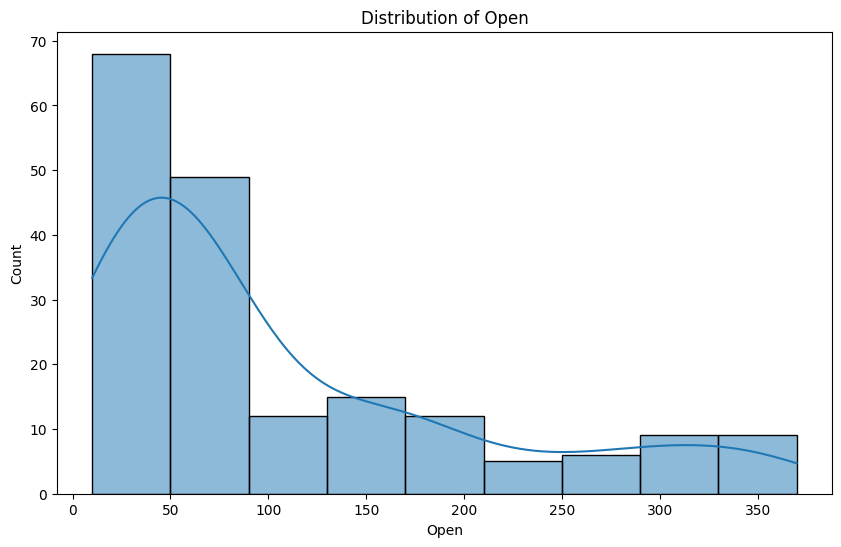

In [ ]:
# Plot for distribution of Open - Univariate Analysis

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'], kde=True)
plt.title('Distribution of Open')
plt.show()

##### 1. Why did you pick the specific chart?




*   Selecting a hist plot with a KDE overlay to visualize the frequency and pattern of the "Open" stock prices over the dataset.
*   This helps understand whether the values are skewed, normally distributed, or contain outliers.




##### 2. What is/are the insight(s) found from the chart?



*   The distribution is right-skewed, with most opening prices clustered below 100.

*   Very few instances where opening prices were above 200.

*   Suggests a decline in investor confidence or bank valuation over time, as the stock opened at higher prices only in the earlier periods.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Traders/investors can use this to identify historical valuation bands and risk exposure.
*   Also found the graph is right skewed and needs transformtion before the model training.
*   Internal stakeholders may correlate these trends with key business or governance events, enabling data-driven decision making.



#### Chart - 3

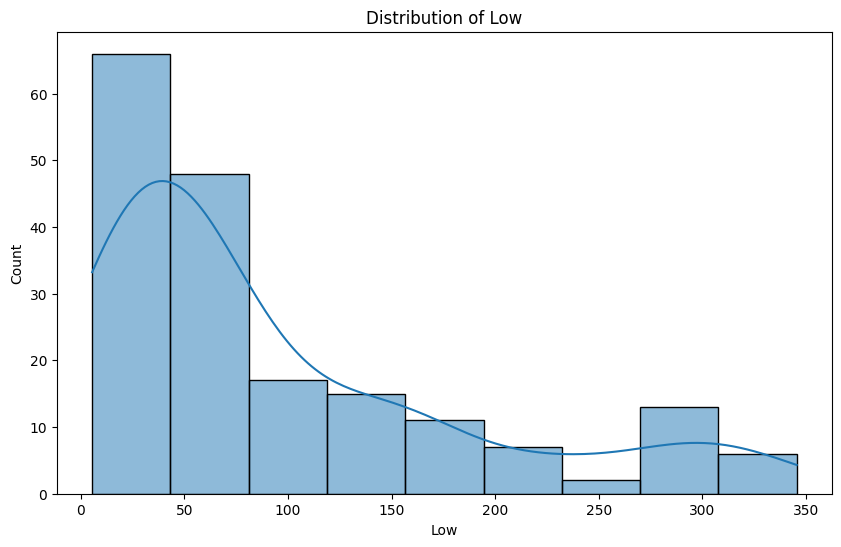

In [ ]:
# Plot for distribution of Low - Univariate Analysis

plt.figure(figsize=(10, 6))
sns.histplot(df['Low'], kde=True)
plt.title('Distribution of Low')
plt.show()

##### 1. Why did you pick the specific chart?



*   Selecting a hist plot with a KDE overlay to visualize the frequency and pattern of the "Low" stock prices over the dataset.
*   This helps understand whether the values are skewed, normally distributed, or contain outliers.


##### 2. What is/are the insight(s) found from the chart?



*   The "Low" prices are right-skewed, with the majority of values concentrated below 100.
*   There are significantly fewer occurrences of higher prices, indicating that the stock typically trades at lower levels.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes. Understanding that the stock often hits lows below 100 can guide risk assessments, investment strategies, and alert setups for traders or analysts focused on price movements and entry points.


#### Chart - 4

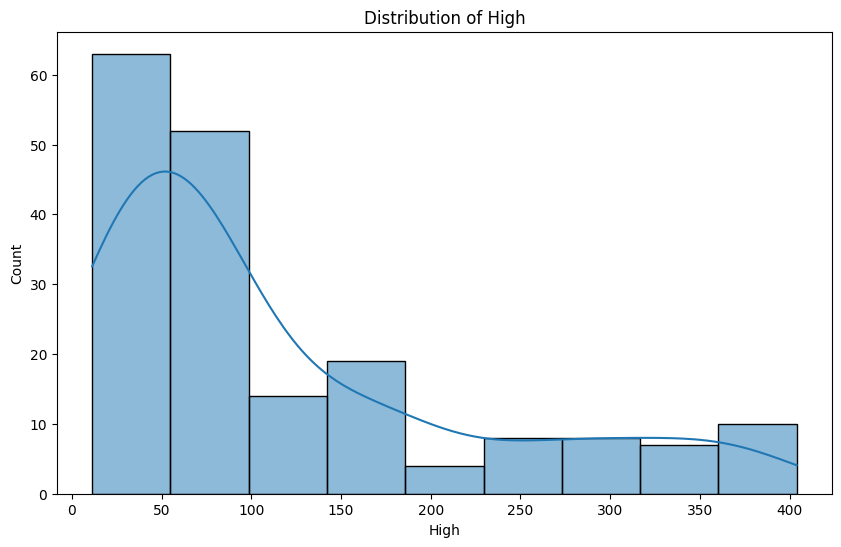

In [ ]:
# Plot for distribution of High - Univariate Analysis

plt.figure(figsize=(10, 6))
sns.histplot(df['High'], kde=True)
plt.title('Distribution of High')
plt.show()

##### 1. Why did you pick the specific chart?


*   Selecting a hist plot with a KDE overlay to visualize the frequency and pattern of the "High" stock prices over the dataset.
*   This helps understand whether the values are skewed, normally distributed, or contain outliers.

##### 2. What is/are the insight(s) found from the chart?



*   The distribution is right-skewed, with most of the "High" values clustered below 100.
*   A few stocks have significantly higher values, which indicates the presence of outliers or a small set of high-performing days.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes. Identifying this skew can help financial analysts understand market volatility and price ceilings.
*   From the insight found we can see the data is right skewed and helps us to transform the data before building the model.



#### Chart - 5

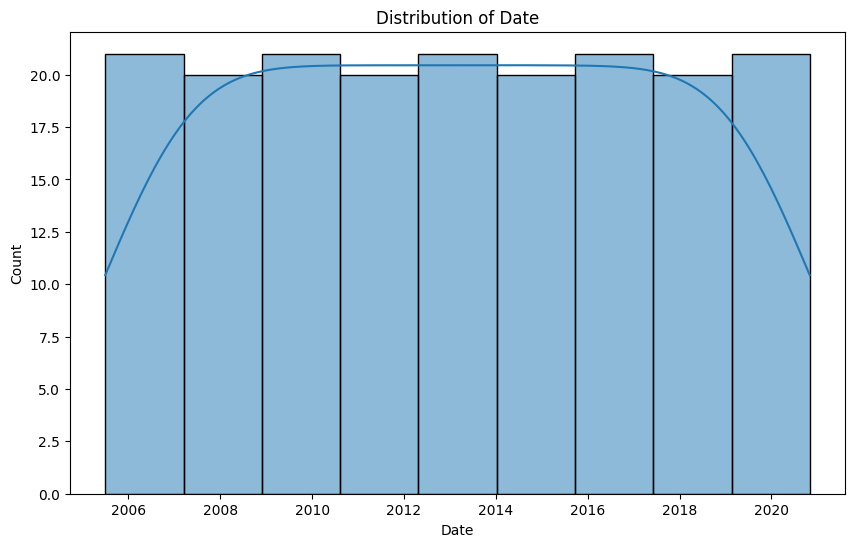

In [ ]:
# Plot for distribution of Date - Univariate Analysis

plt.figure(figsize=(10, 6))
sns.histplot(df['Date'], kde=True)
plt.title('Distribution of Date')
plt.show()

##### 1. Why did you pick the specific chart?


*   Selecting a hist plot with a KDE overlay to visualize the frequency and pattern of the "Date" over the dataset.
*   This helps understand whether the values are skewed, normally distributed, or contain outliers.

##### 2. What is/are the insight(s) found from the chart?



*   The data is fairly evenly distributed from 2005 to 2021.

*   Each bin (approximately 2-year intervals) contains a similar count of entries, showing a consistent historical record.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, A balanced time series improves model reliability and ensures robust trend analysis and forecasting.



#### Chart - 6

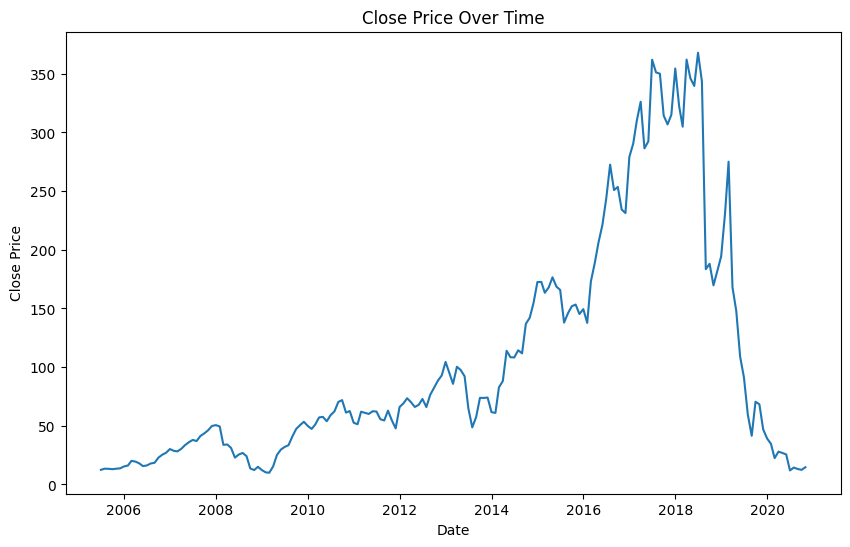

In [ ]:
# Plot between Close and Date - Bivariate Analysis

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

*   The line chart illustrates the monthly closing stock price trend of a company (likely Yes Bank) from 2005 to 2021.
*   It shows how the close price evolved over time (Better to visualize a time-series data).

##### 2. What is/are the insight(s) found from the chart?



*   From 2005 to 2018, there's a general uptrend, peaking between 2017 and 2018.

*   After 2018, there’s a steep and sustained drop, reflecting a major downturn—possibly due to internal or market-wide financial issues.

*   The stock price shows several peaks and valleys, indicating market volatility even during the uptrend.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Identifying periods of growth and decline helps executives evaluate past strategies and refine future investment or divestment decisions.
*   Regulators or company leadership can correlate drops with operational or macroeconomic issues and take corrective actions.



#### Chart - 7

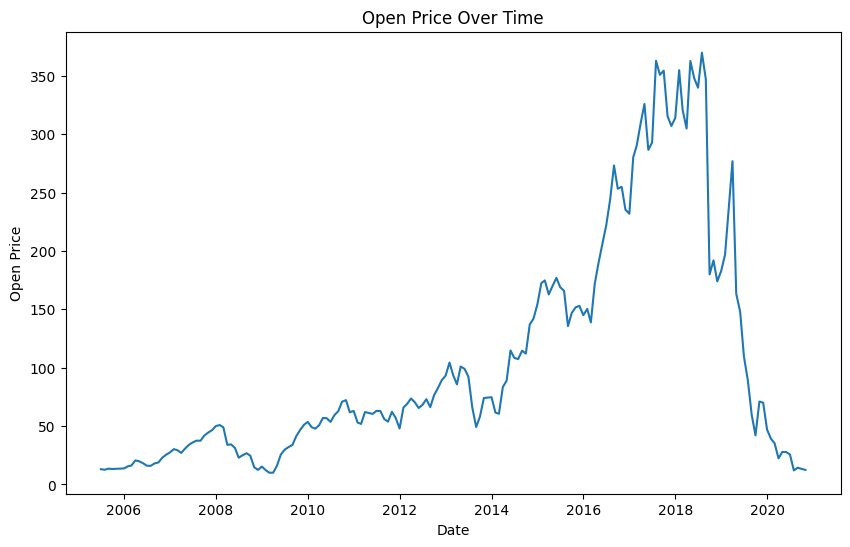

In [ ]:
# Plot between Open and Date - Bivariate Analysis

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Open')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

##### 1. Why did you pick the specific chart?



*   The line chart illustrates the monthly opening stock price trend of a company (likely Yes Bank) from 2005 to 2021.
*   It shows how the open price evolved over time (Better to visualize a time-series data).



##### 2. What is/are the insight(s) found from the chart?



*   The open price of the stock saw a steady increase from 2005 to 2017, peaking between 2017 and 2018.

*   A sharp decline is observed from 2018 onwards, continuing through 2020.

*   This indicates a significant market event or decline in investor confidence post-2018.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   
*   Identifying periods of growth and decline helps executives evaluate past strategies and refine future investment or divestment decisions.
*   Regulators or company leadership can correlate drops with operational or macroeconomic issues and take corrective actions.



#### Chart - 8

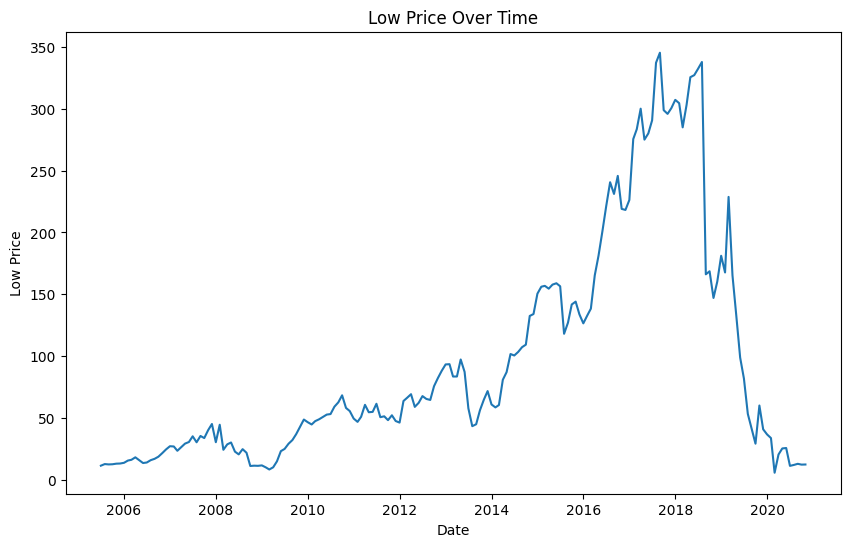

In [ ]:
# Plot between Low and Date - Bivariate Analysis

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Low')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.show()

##### 1. Why did you pick the specific chart?

*   The line chart illustrates the monthly low stock price trend of a company (likely Yes Bank) from 2005 to 2021.
*   It shows how the low price evolved over time (Better to visualize a time-series data).

##### 2. What is/are the insight(s) found from the chart?



*   The low price of the stock (Yes Bank, inferred) followed a long-term uptrend from 2005 to 2018, peaking close to 350.

*   After 2018, there’s a sharp and rapid decline, indicating a major financial crisis or negative event impacting the company.

*   Post-2019, prices stabilized at very low levels (~10–20), showing continued underperformance.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   Identifying periods of growth and decline helps executives evaluate past strategies and refine future investment or divestment decisions.
*   Regulators or company leadership can correlate drops with operational or macroeconomic issues and take corrective actions.

#### Chart - 9

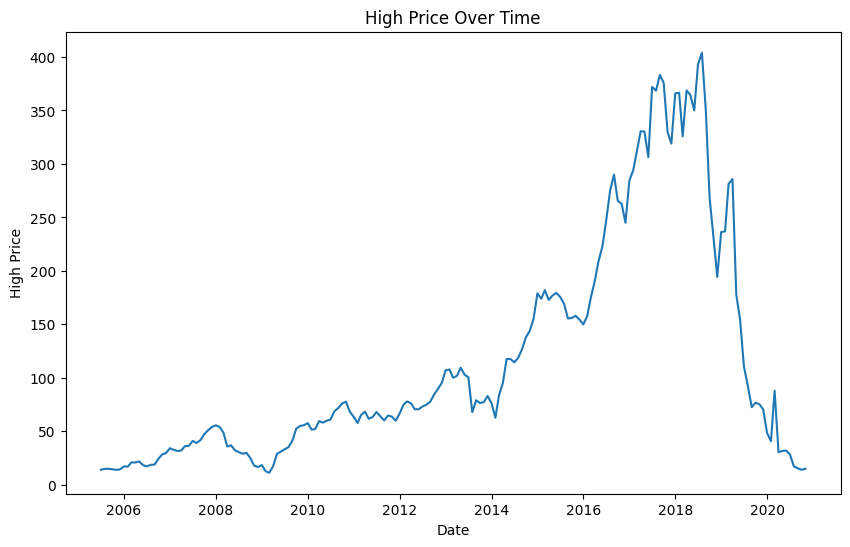

In [ ]:
# Plot between High and Date - Bivariate Analysis

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='High')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

##### 1. Why did you pick the specific chart?

*   The line chart illustrates the monthly high stock price trend of a company (likely Yes Bank) from 2005 to 2021.
*   It shows how the high price evolved over time (Better to visualize a time-series data).

##### 2. What is/are the insight(s) found from the chart?



*   The stock's high price rose gradually from 2005 to 2015, followed by a sharp surge reaching its peak around 2017–2018.

*   After the peak, there's a steep decline, suggesting significant loss of investor confidence or major negative events.

*   The volatility increased considerably during the peak years, indicating instability (2016-2018).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   Identifying periods of growth and decline helps executives evaluate past strategies and refine future investment or divestment decisions.
*   Regulators or company leadership can correlate drops with operational or macroeconomic issues and take corrective actions.

#### Chart - 10

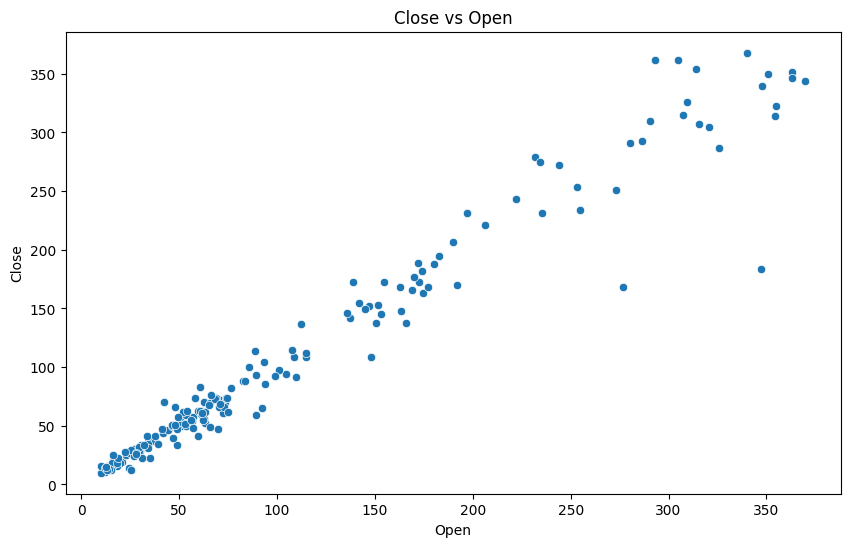

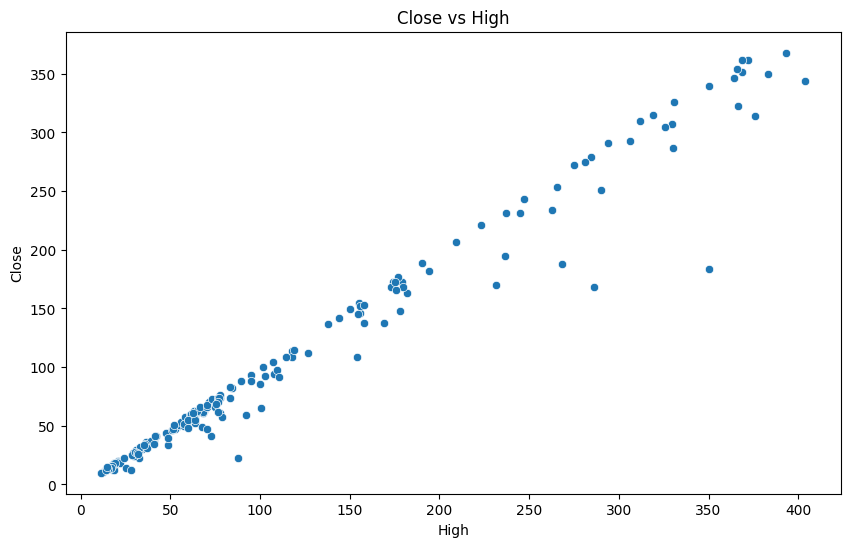

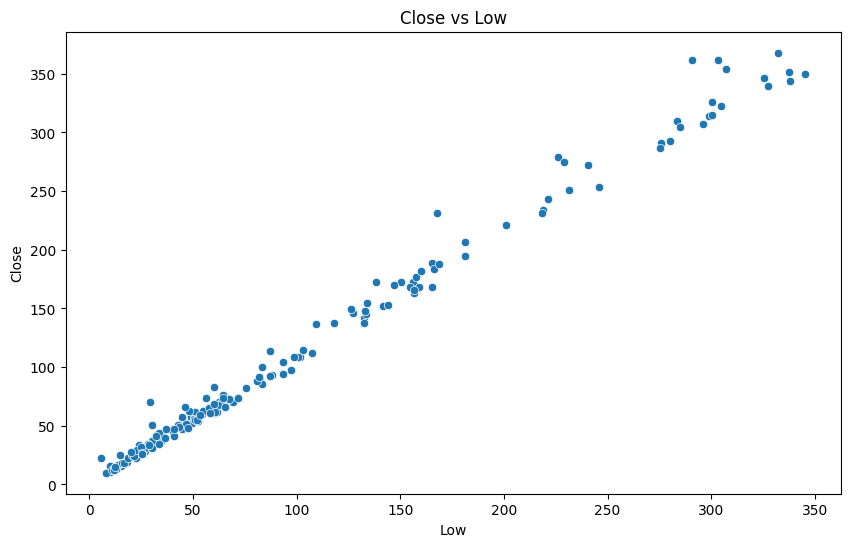

In [ ]:
# Plot between Close and all Open, High, Low - Bivariate Analysis

for col in ['Open', 'High', 'Low']:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(data=df, x=col, y='Close')
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title(f'Close vs {col}')
  plt.show()

##### 1. Why did you pick the specific chart?



*   This scatter plot was chosen to visualize the relationship between the opening price, highest, lowest and closing price of a stock.
*   It is ideal because it helps assess whether the stock tends to close higher, lower, or close — essential for understanding market sentiment and stock volatility.


##### 2. What is/are the insight(s) found from the chart?



*   Close vs Open: There is a very strong positive linear relationship between the opening and closing prices. The points cluster tightly around a diagonal line, indicating that as the opening price increases, the closing price also tends to increase proportionally.
*   Close vs High: There is also a very strong positive linear relationship between the highest price and the closing price. The points are closely aligned along a diagonal, showing that higher daily highs are strongly associated with higher closing prices.
*   Close vs Low: Similarly, there is a very strong positive linear relationship between the lowest price and the closing price. The scatter plot shows a tight clustering of points along a diagonal, indicating that months with higher daily lows tend to have higher closing prices.



#### Chart - 11

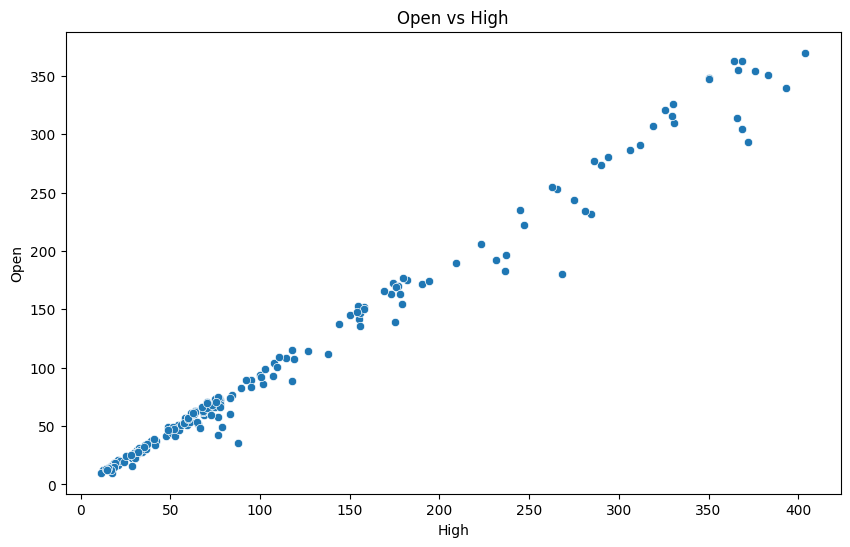

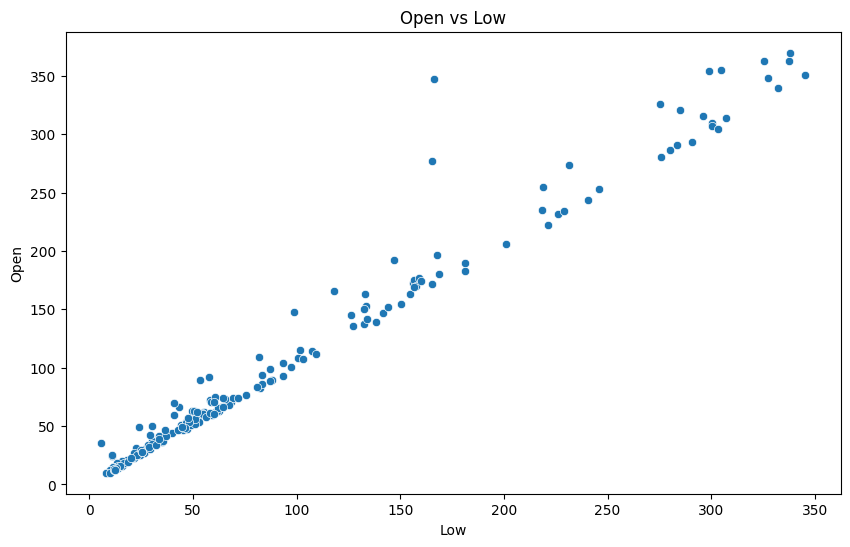

In [ ]:
# Plot between Open and Low, High - Bivariate Analysis

for col in ['High', 'Low']:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(data=df, x=col, y='Open')
  plt.xlabel(col)
  plt.ylabel('Open')
  plt.title(f'Open vs {col}')
  plt.show()

##### 1. Why did you pick the specific chart?


*   This scatter plot was chosen to visualize the relationship between the opening price, highest, lowest and closing price of a stock.
*   It is ideal because it helps assess whether the stock tends to close higher, lower, or close — essential for understanding market sentiment and stock volatility.

##### 2. What is/are the insight(s) found from the chart?



*   **Open vs High:** There is a very strong positive linear relationship between the opening price and the highest price reached during the month. The points are tightly clustered along a diagonal line, indicating that months starting with a higher price tend to see a proportionally higher peak price as well.
*   **Open vs Low:** Similarly, there is a very strong positive linear relationship between the opening price and the lowest price reached during the month. The points are closely aligned along a diagonal, showing that months opening at a higher price tend to have their lowest point also at a higher level.



#### Chart - 12

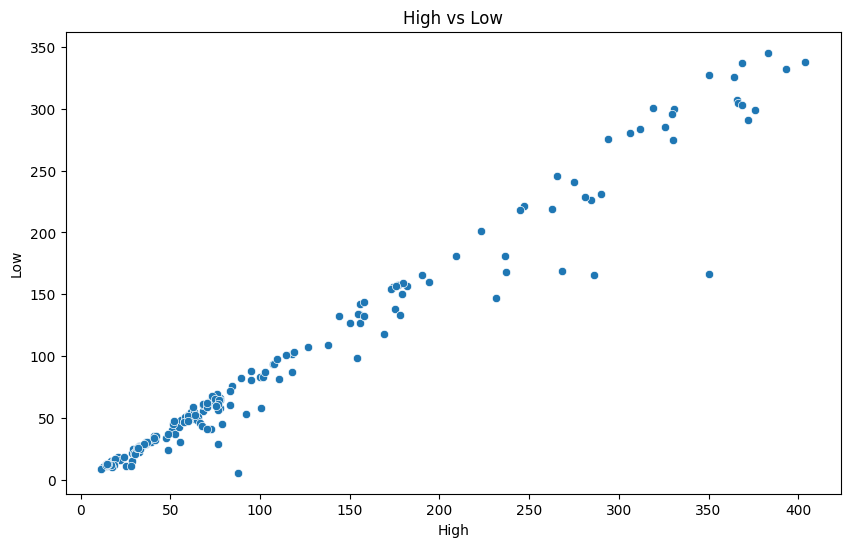

In [ ]:
# PLot between High and Low - Bivariate Analysis

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='High', y='Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.title('High vs Low')
plt.show()

##### 1. Why did you pick the specific chart?

*   This scatter plot was chosen to visualize the relationship between the opening price, highest, lowest and closing price of a stock.
*   It is ideal because it helps assess whether the stock tends to close higher, lower, or close — essential for understanding market sentiment and stock volatility.

##### 2. What is/are the insight(s) found from the chart?



*   **High vs Low:** The scatter plot shows a very strong positive linear relationship between the highest price and the lowest price reached during the month. The points are tightly clustered along a diagonal line. This indicates that in months where the stock reaches a higher peak ('High'), its lowest point ('Low') is also typically at a higher level. Conversely, when the stock's low point is lower, its high point for that month is also generally lower.



#### Chart - 13

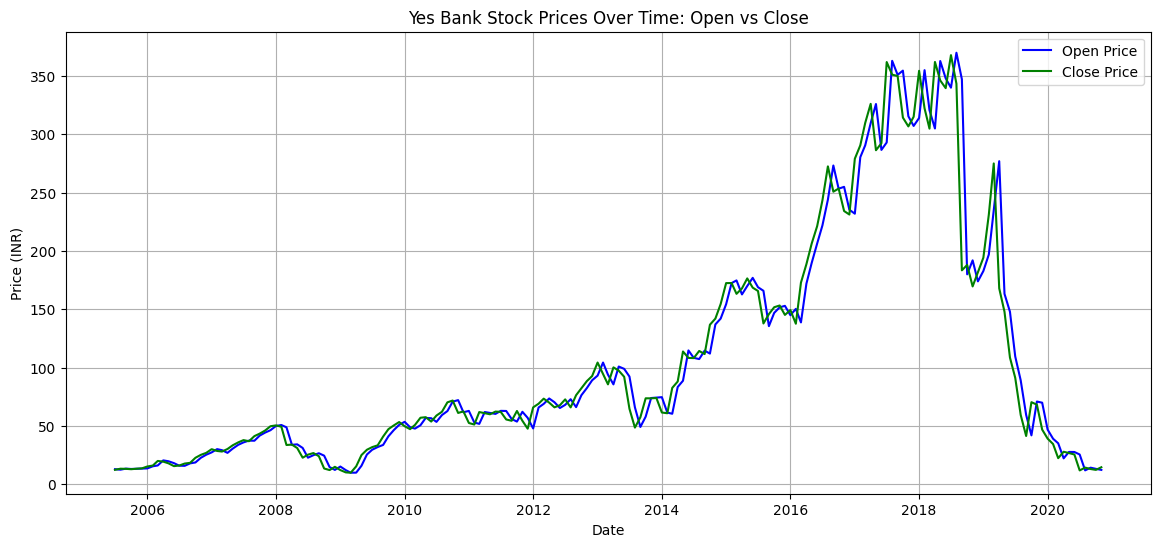

In [ ]:
# Plot of Open and Close with time - Multivariate Analysis

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='blue')
plt.plot(df['Date'], df['Close'], label='Close Price', color='green')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.title('Yes Bank Stock Prices Over Time: Open vs Close')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

*   A line chart is ideal for time series data.

*   It helps identify growth patterns, volatility, peaks, and crashes in stock prices over a long time frame (2005–2020).

##### 2. What is/are the insight(s) found from the chart?



*   Both Open and Close prices rose sharply from 2013 to 2018, indicating a strong bull market for Yes Bank.
*   A sharp decline in both lines post-2018 reveals a collapse in investor confidence, likely due to internal or regulatory crises.
*   The almost overlapping nature of the lines indicates that opening and closing prices are highly correlated.


#### Chart - 14

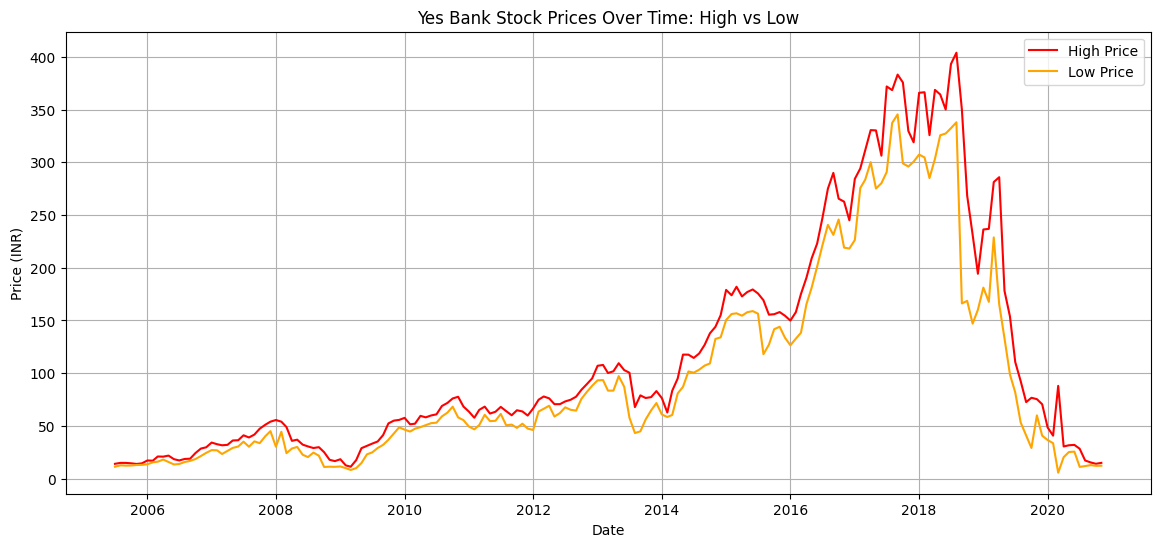

In [ ]:
# Plot for High and Low over time - Multivariate Analysis

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['High'], label='High Price', color='red')
plt.plot(df['Date'], df['Low'], label='Low Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.title('Yes Bank Stock Prices Over Time: High vs Low')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

*   A line chart is ideal for time series data.

*   It helps identify growth patterns, volatility, peaks, and crashes in stock prices over a long time frame (2005–2020).

##### 2. What is/are the insight(s) found from the chart?



*   From 2005 to 2018, Yes Bank’s stock showed a strong upward trend.
*   The gap between High and Low prices widened, especially around 2018.
*   Post-2019, there's a drastic and rapid fall in both High and Low prices.
*   The High and Low prices moved together consistently, maintaining a relatively narrow band during stable periods.



#### Chart - 15 - Correlation Heatmap

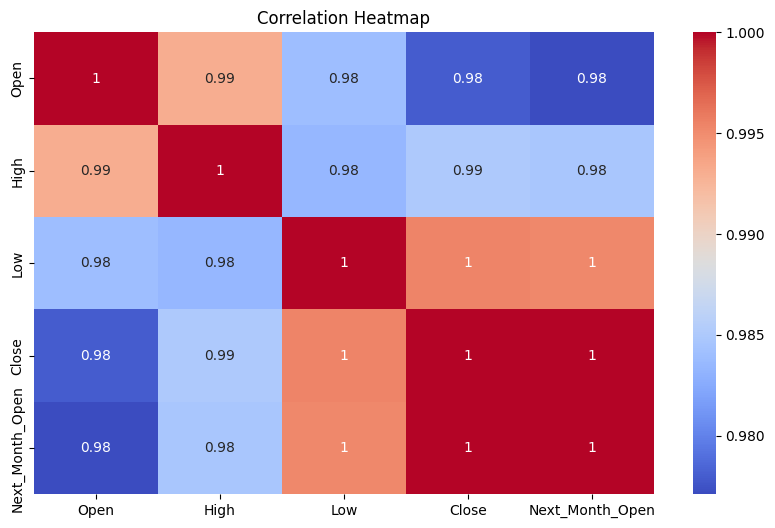

In [ ]:
# Plot for Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?



*   A correlation heatmap is a graphical representation of a correlation matrix. It uses colors to indicate the strength and direction of the linear relationship between pairs of variables.
*   The numerical values within the cells show the correlation coefficient (Pearson's r), ranging from -1 to +1.
*   This chart is essential for understanding multicollinearity among features (which can affect some linear models) and for identifying features that are strongly related to the target variable ('Close').




##### 2. What is/are the insight(s) found from the chart?



*   All correlation values are very high (≥ 0.98), indicating that the features are highly linearly related to one another.
*   Next_Month_Open has a very high correlation (~1.00) with Close, Low, and High. This suggests that the previous month's price behavior strongly influences the next month's opening price.




#### Chart - 16 - Pair Plot

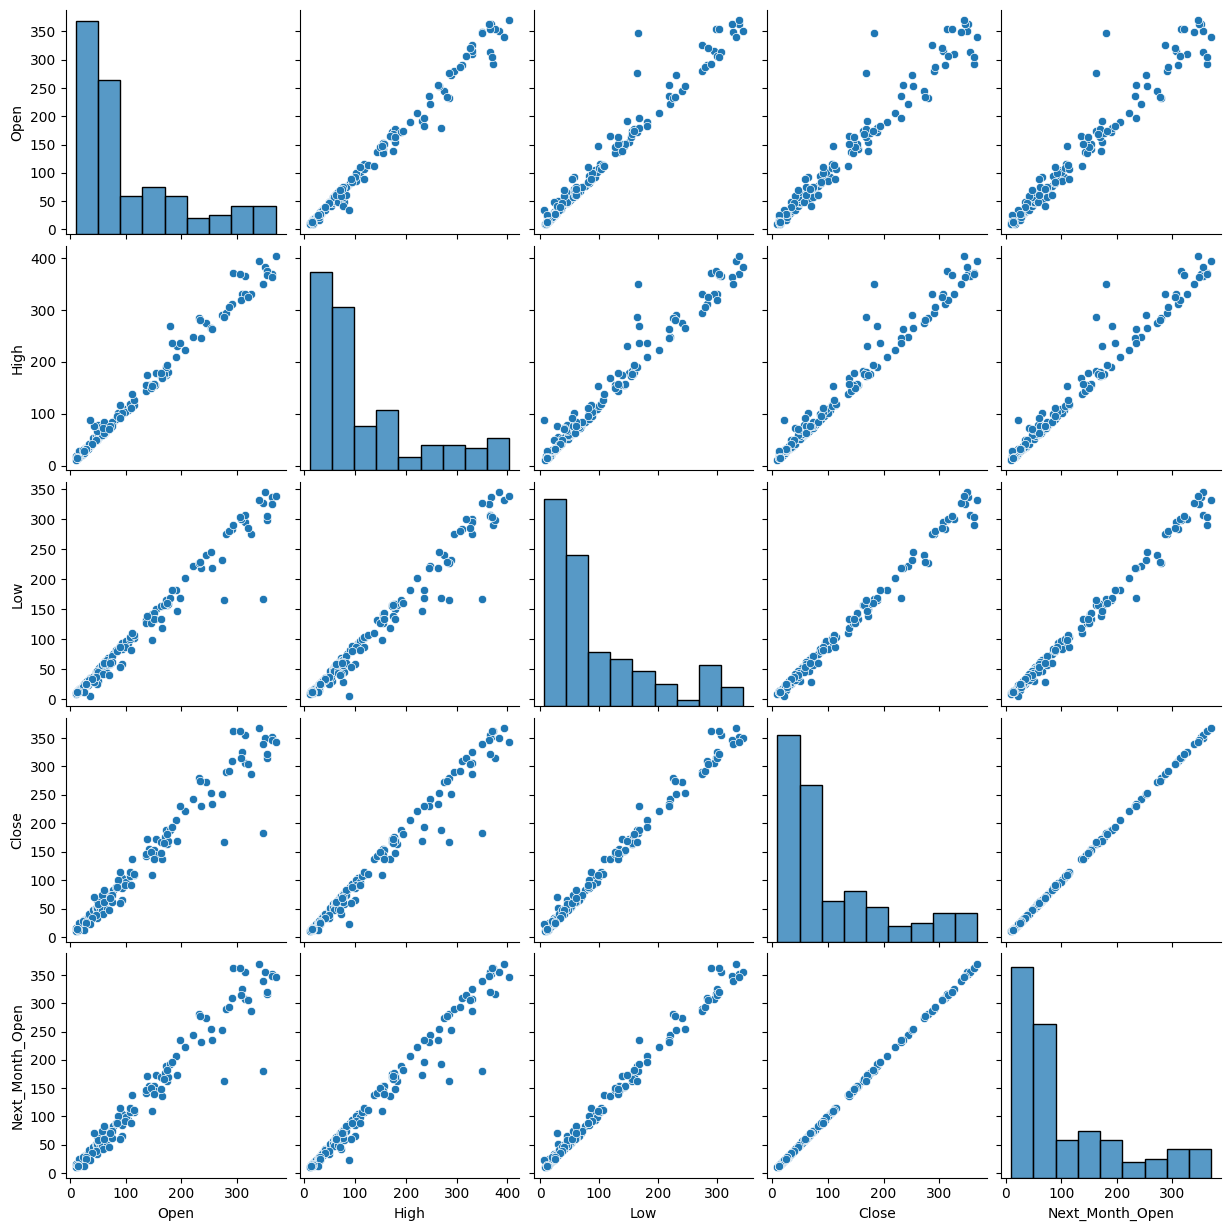

In [ ]:
# Plot for Pair Plot

sns.pairplot(numerical_df)
plt.show()

##### 1. Why did you pick the specific chart?



*   This pair plot was chosen because it allows a comprehensive and simultaneous visual analysis of relationships between all pairs of numerical features
*   It shows scatterplots for every pair of variables, enabling a quick look at linear trends, clusters, or outliers.
*   The diagonal contains histograms that display the distribution of each variable.



##### 2. What is/are the insight(s) found from the chart?



*   Most scatterplots show a tight linear pattern, especially (Open vs Close, High vs Low, Close vs Next_Month_Open). This confirms a very high correlation between these features — in line with the heatmap earlier.
*   Histograms on the diagonal show right-skewed distributions.
*   Some scatterplots (e.g., Low vs Close, High vs Next_Month_Open) show a few points deviating from the linear trend, suggesting potential outliers — likely from the volatile 2018–2020 period.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average closing price of Yes Bank stock before 2018 is significantly higher than the average closing price after 2018.

Null Hypothesis (H0) = The average closing price before 2018 is equal to or less than the average closing price after 2018.

Alternative Hypothesis (Ha): The average closing price before 2018 is significantly higher than the average closing price after 2018.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate data before and after 2018

df_before_2018 = df[df['Year'] < 2018].copy()
df_after_2018 = df[df['Year'] >= 2018].copy()

# Perform Statistical Test to obtain P-Value, ie., Independent Samples t-test

t_stat_close, p_value_close = ttest_ind(df_before_2018['Close'], df_after_2018['Close'], alternative='greater')

print(f"Hypothesis 1: Average Close Price")
print(f"T-statistic: {t_stat_close}")
print(f"P-value: {p_value_close}")

Hypothesis 1: Average Close Price
T-statistic: -2.970367837565708
P-value: 0.9983132383679922


##### Which statistical test have you done to obtain P-Value?



*   I used an independent samples t-test.
*   With a p-value of 0.998, which is much greater than the typical significance level (alpha) of 0.05, i fail to reject the null hypothesis.



##### Why did you choose the specific statistical test?

The independent samples t-test is the standard statistical method for determining if the means of two independent groups are significantly different from each other.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant difference in the variability (standard deviation) of the 'High' price before and after 2018.

Null Hypothesis (H0): The standard deviation of the 'High' price before 2018 is equal to the standard deviation of the 'High' price after 2018.

Alternative Hypothesis (Ha): The standard deviation of the 'High' price before 2018 is not equal to the standard deviation of the 'High' price after 2018.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value ie., Levene's test for equality of variances

stat_levene, p_value_levene = levene(df_before_2018['High'], df_after_2018['High'])

print(f"Hypothesis 2: Variability of High Price")
print(f"Levene statistic: {stat_levene}")
print(f"P-value: {p_value_levene}")

Hypothesis 2: Variability of High Price
Levene statistic: 19.918083822748773
P-value: 1.4098730946480416e-05


##### Which statistical test have you done to obtain P-Value?



*   I used Levene's test for equality of variances.
*   Since the p-value (0.000014...) is much, much smaller than the typical significance level (alpha) of 0.05 (or even 0.01), i reject the null hypothesis.
*   This means we have strong statistical evidence to conclude that there is a significant difference in the variability (standard deviation) of the 'High' price of Yes Bank stock before 2018 compared to after 2018.



##### Why did you choose the specific statistical test?

Levene's test is suitable as it tests if the variances of two or more groups are equal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The correlation between 'Open' and 'Close' prices is significantly different from zero.

Null Hypothesis (H0): The correlation between 'Open' and 'Close' prices is zero.

Alternative Hypothesis (Ha): The correlation between 'Open' and 'Close' prices is significantly different from zero.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value ie., Pearson correlation test

corr_open_close, p_value_open_close = pearsonr(df['Open'], df['Close'])

print(f"Hypothesis 3: Correlation between Open and Close")
print(f"Pearson correlation coefficient: {corr_open_close}")
print(f"P-value: {p_value_open_close}")

Hypothesis 3: Correlation between Open and Close
Pearson correlation coefficient: 0.9779710062230935
P-value: 1.8527745058654608e-126


##### Which statistical test have you done to obtain P-Value?



*   I used the Pearson correlation test.
*   With a p-value (approximately 0) that is much, much smaller than any reasonable significance level (e.g., 0.05, 0.001), i reject the null hypothesis.
*   We have overwhelming statistical evidence to conclude that the correlation between 'Open' and 'Close' prices in this dataset is significantly different from zero.



##### Why did you choose the specific statistical test?

Pearson correlation test is the most appropriate and widely used statistical test when you want to assess and test for the significance of a linear relationship between two continuous variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

df_org = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_org.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present in the dataset.

### 2. Handling Outliers

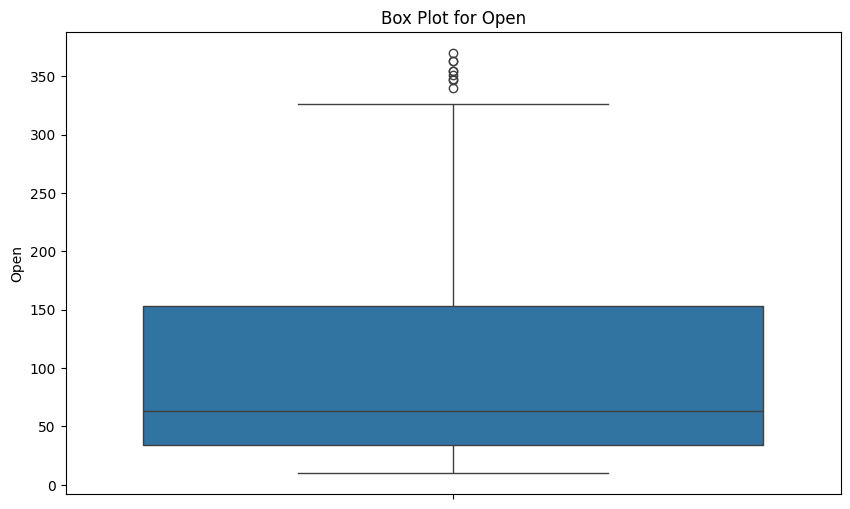

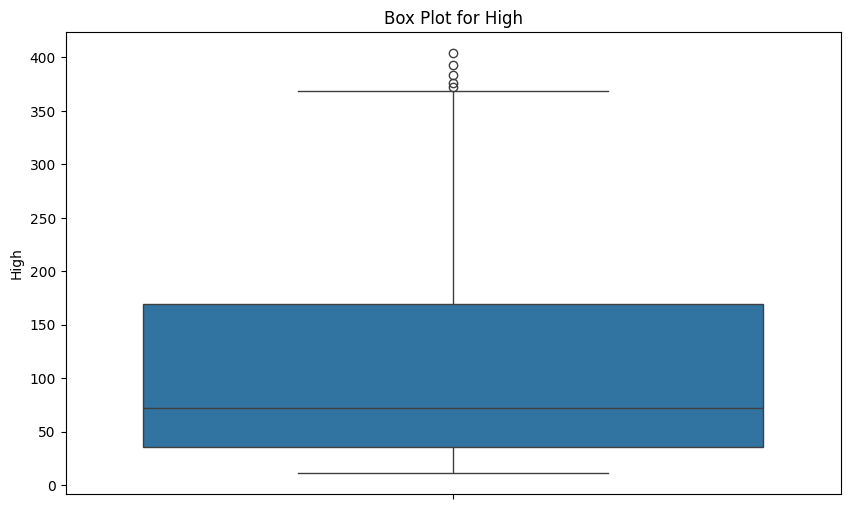

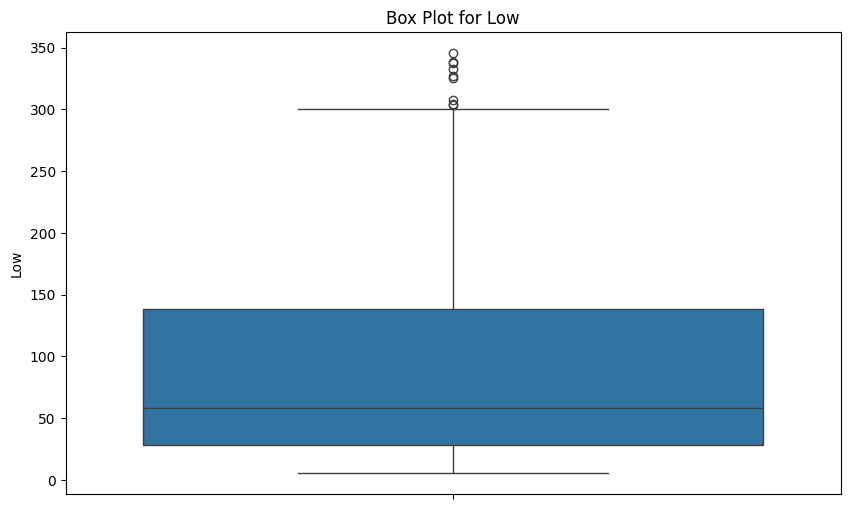

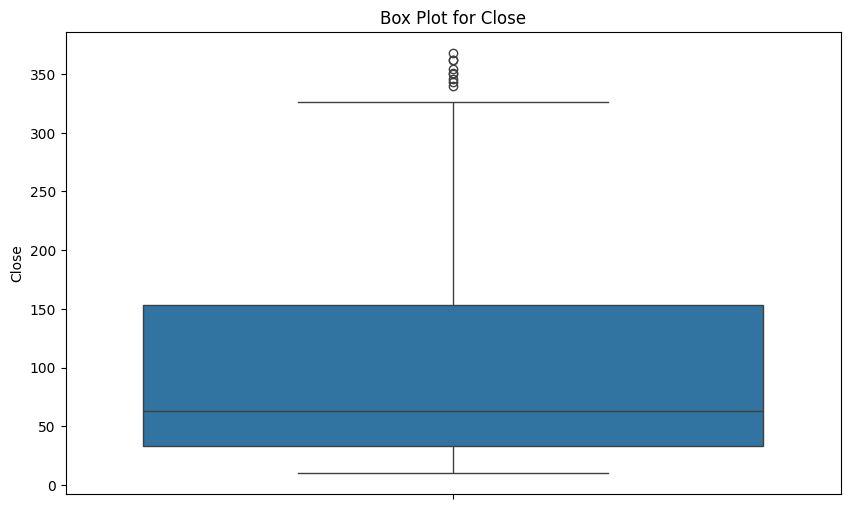

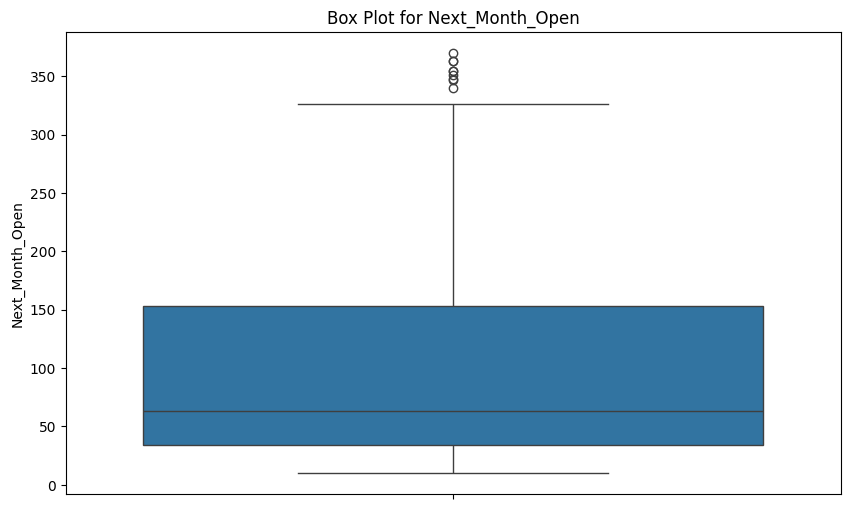

In [ ]:
# Handling Outliers

for col in numerical_df.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(df[col])
  plt.title(f'Box Plot for {col}')
  plt.show()

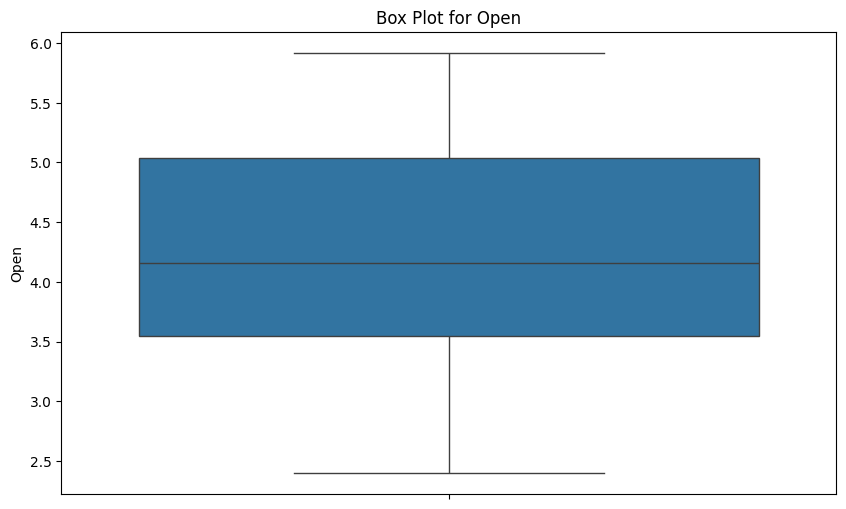

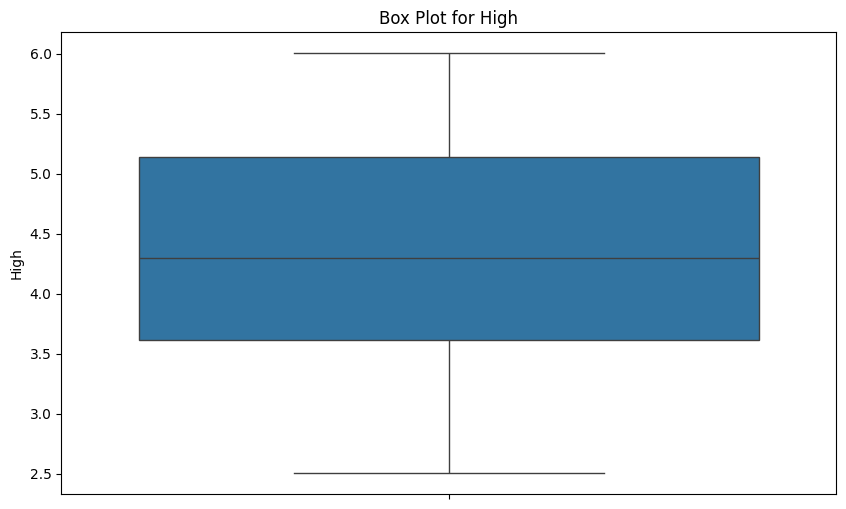

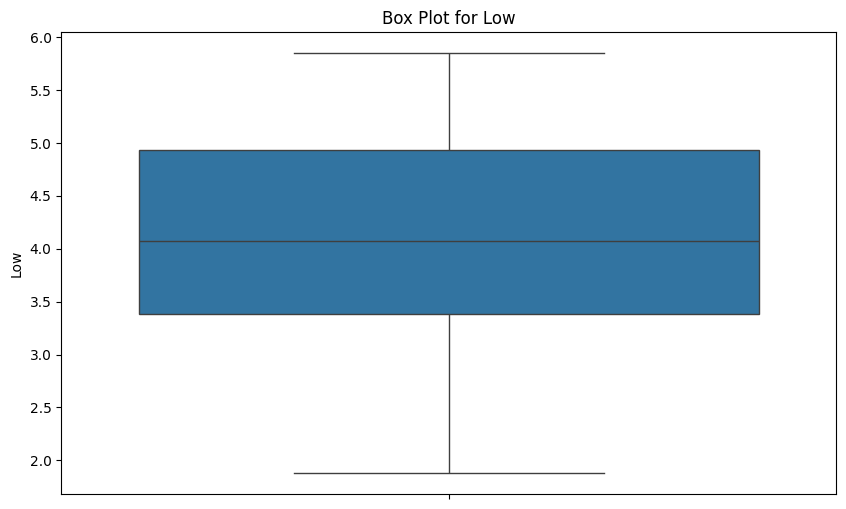

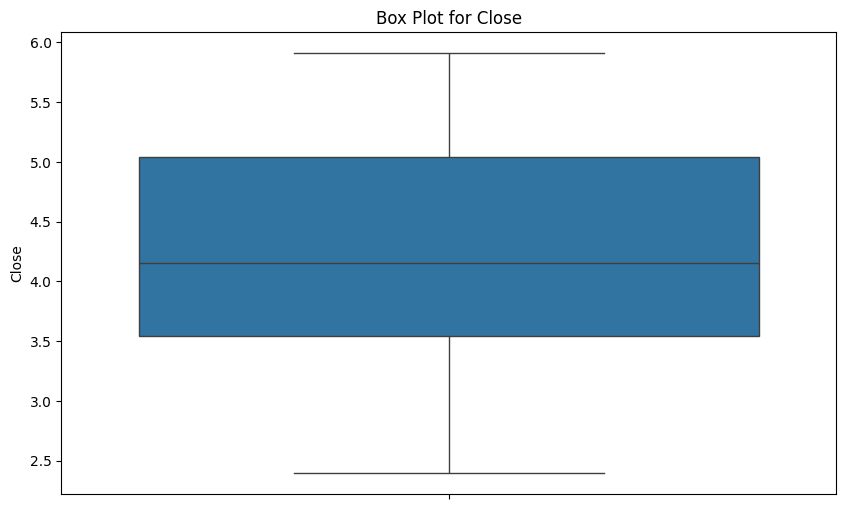

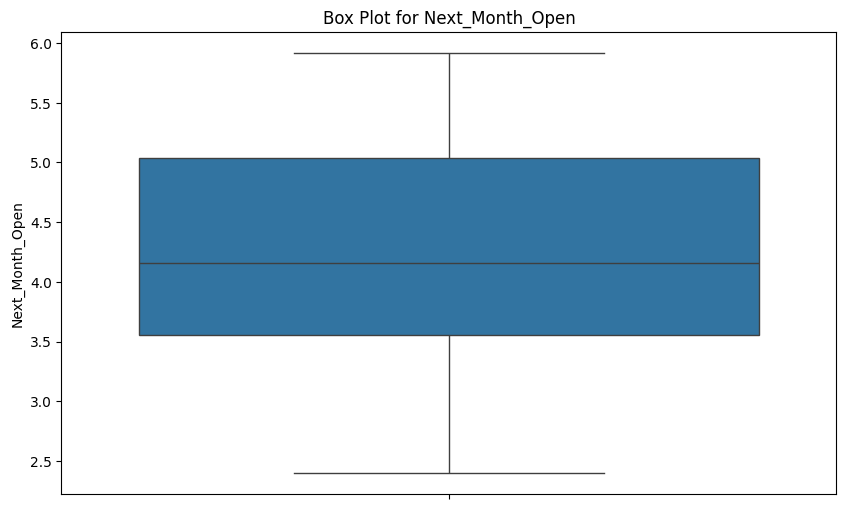

In [ ]:
# Treating Outliers

# Log Transformation

for col in numerical_df.columns:
  df[col] = np.log1p(df[col])
  plt.figure(figsize=(10, 6))
  sns.boxplot(df[col])
  plt.title(f'Box Plot for {col}')
  plt.show()



##### What all outlier treatment techniques have you used and why did you use those techniques?



*    Have used the Log Transformation technique to treat outliers in the numerical columns ('Open', 'High', 'Low', 'Close'). Specifically, you used np.log1p(), which calculates log(1 + x).
*   The initial histograms showed that the numerical features were right-skewed, with a concentration of values at the lower end and a long tail towards higher values (outliers).
*   Log transformation is a common and effective way to make skewed distributions more symmetric and closer to a normal distribution.
*   The logarithm function compresses the range of larger values much more than smaller values. By taking the logarithm of the stock prices, the extreme high values (outliers) have a reduced influence on the overall distribution and subsequent analysis or modeling.



### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Creating Lagged Features (e.g., previous month's prices)

df['Open_Lag1'] = df['Open'].shift(1)
df['High_Lag1'] = df['High'].shift(1)
df['Low_Lag1'] = df['Low'].shift(1)
df['Close_Lag1'] = df['Close'].shift(1)

# Creating Rolling Statistics (e.g., Rolling Standard Deviation)

df['Close_Rolling_Std_3M'] = df['Close'].rolling(window=3).std()

display(df.head())

# Dropping rows with NaN values created by lagging and rolling

df.dropna(inplace=True)

print(f"Shape of DataFrame after dropping NaNs: {df.shape}")

,Date,Open,High,Low,Close,Month,Year,Month_Year,3_Month_MA,6_Month_MA,12_Month_MA,Next_Month_Open,Open_Lag1,High_Lag1,Low_Lag1,Close_Lag1,Close_Rolling_Std_3M
0,2005-07-01,2.639057,2.708050,2.505526,2.599722,7,2005,2005-07,NaN,NaN,NaN,2.608598,NaN,NaN,NaN,NaN,NaN
1,2005-08-01,2.608598,2.765060,2.606387,2.668616,8,2005,2005-08,NaN,NaN,NaN,2.672768,2.639057,2.708050,2.505526,2.599722,NaN
2,2005-09-01,2.672768,2.764431,2.585506,2.660260,9,2005,2005-09,13.060000,NaN,NaN,2.653242,2.608598,2.765060,2.606387,2.668616,0.037596
3,2005-10-01,2.653242,2.738903,2.595255,2.638343,10,2005,2005-10,13.236667,NaN,NaN,2.663750,2.672768,2.764431,2.585506,2.660260,0.015635
4,2005-11-01,2.663750,2.700018,2.630449,2.667922,11,2005,2005-11,13.233333,NaN,NaN,2.673459,2.653242,2.738903,2.595255,2.638343,0.015352


Shape of DataFrame after dropping NaNs: (173, 17)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Calculating the correlation of all features with the 'Close' price
# Excluding non-numeric columns like 'Date' and 'Month_Year'

correlations = df.drop(['Date', 'Month_Year'], axis=1).corr()['Close'].sort_values(ascending=False)

print("Correlation of features with 'Close' price:")
display(correlations)

feature_df = df.drop(['Date', 'Month_Year', 'Next_Month_Open', 'Close_Lag1'], axis=1)
display(feature_df.head())
print(f'Shape of feature dataframe is {feature_df.shape}')

Correlation of features with 'Close' price:


,Close
Close,1.000000
Next_Month_Open,0.999916
Low,0.989940
High,0.984963
Close_Lag1,0.982450
Open,0.982343
Low_Lag1,0.969036
High_Lag1,0.966682
Open_Lag1,0.959986
3_Month_MA,0.909421


,Open,High,Low,Close,Month,Year,3_Month_MA,6_Month_MA,12_Month_MA,Open_Lag1,High_Lag1,Low_Lag1,Close_Rolling_Std_3M
11,2.954910,2.965273,2.667228,2.810607,6,2006,17.713333,17.445000,15.330000,3.034953,3.126761,2.821379,0.106160
12,2.833213,2.901422,2.695978,2.842581,7,2006,16.603333,17.583333,15.638333,2.954910,2.965273,2.667228,0.070778
13,2.827314,2.975530,2.815409,2.935982,8,2006,16.540000,17.870000,16.006667,2.833213,2.901422,2.695978,0.065147
14,2.944439,2.989714,2.879198,2.968361,9,2006,17.486667,17.600000,16.436667,2.827314,2.975530,2.815409,0.065311
15,2.984671,3.226844,2.970414,3.168845,10,2006,19.693333,18.148333,17.252500,2.944439,2.989714,2.879198,0.126140


Shape of feature dataframe is (173, 13)


##### What all feature selection methods have you used  and why?

I have used Correlation Analysis as a feature selection method.



*   Correlation analysis is a straightforward and easy-to-understand method to identify the linear relationship between each feature and the target variable ('Close').
*   Features with high absolute correlation values with the target are generally considered more relevant and potentially more useful for predicting the target variable.




##### Which all features you found important and why?

Based on the correlation analysis with the 'Close' price:



*   **Highly Correlated Features:** The original price features (Open, High, Low), the lagged price features (Open_Lag1, High_Lag1, Low_Lag1, Close_Lag1), and the moving averages (3_Month_MA, 6_Month_MA, 12_Month_MA) show very high positive correlations with the 'Close' price. These features are highly important as they directly reflect recent and past price movements and trends, which are strong indicators for predicting the current closing price.
*   **Moderately Correlated Features:** The Year feature shows a moderate positive correlation (0.5842), indicating that there is an overall trend in stock prices over the years. The Close_Rolling_Std_3M has a negative correlation (-0.2811), suggesting that periods of higher price volatility (as measured by standard deviation) are somewhat associated with lower closing prices.
*   **Low Correlation Features:** The Month, Month_sin, and Month_cos features have very low absolute correlations with 'Close'. While their linear correlation is low, the sine and cosine transformations are still valuable for capturing potential cyclical patterns in the data that linear correlation might not reveal.
*   **Feature to Exclude:** Next_Month_Open has an extremely high correlation (0.9999), but this is because it represents the opening price of the next month. Including this feature to predict the current month's closing price would be data leakage, as it uses future information. Therefore, this feature should be excluded from the features used for model training.


In summary, the most important features for predicting the closing price appear to be the original price features, their lagged versions, and the moving averages due to their strong correlation and direct relationship with price movements. The Year also captures a significant trend.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Apply sine and cosine transformations to the 'Month' column

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Display the first few rows to see the new features
display(df.head())

,Date,Open,High,Low,Close,Month,Year,Month_Year,3_Month_MA,6_Month_MA,12_Month_MA,Next_Month_Open,Open_Lag1,High_Lag1,Low_Lag1,Close_Lag1,Close_Rolling_Std_3M,Month_sin,Month_cos
11,2006-06-01,2.954910,2.965273,2.667228,2.810607,6,2006,2006-06,17.713333,17.445000,15.330000,2.833213,3.034953,3.126761,2.821379,2.946017,0.106160,1.224647e-16,-1.000000e+00
12,2006-07-01,2.833213,2.901422,2.695978,2.842581,7,2006,2006-07,16.603333,17.583333,15.638333,2.827314,2.954910,2.965273,2.667228,2.810607,0.070778,-5.000000e-01,-8.660254e-01
13,2006-08-01,2.827314,2.975530,2.815409,2.935982,8,2006,2006-08,16.540000,17.870000,16.006667,2.944439,2.833213,2.901422,2.695978,2.842581,0.065147,-8.660254e-01,-5.000000e-01
14,2006-09-01,2.944439,2.989714,2.879198,2.968361,9,2006,2006-09,17.486667,17.600000,16.436667,2.984671,2.827314,2.975530,2.815409,2.935982,0.065311,-1.000000e+00,-1.836970e-16
15,2006-10-01,2.984671,3.226844,2.970414,3.168845,10,2006,2006-10,19.693333,18.148333,17.252500,3.169686,2.944439,2.989714,2.879198,2.968361,0.126140,-8.660254e-01,5.000000e-01


**Log Transformation:** I applied log transformation (specifically np.log1p) to the numerical columns (Open, High, Low, Close) while hndling Outliers.

**Reasoning:** The initial distributions of the price features were right-skewed, as observed in the histograms. Log transformation is a common technique to make skewed distributions more symmetric, which can improve the performance of some linear models that assume normally distributed errors. It also helps to reduce the impact of outliers. np.log1p is used instead of np.log to handle potential zero values gracefully (log(0) is undefined, while log1p(0) is 0).

**Sine and Cosine Transformations for Month:** I created Month_sin and Month_cos columns from the Month column.

**Reasoning:** The month of the year is a cyclical feature. Using the raw month number (1-12) would imply a linear relationship, which doesn't accurately reflect that December is followed by January. Sine and cosine transformations map the month onto a circle, preserving the cyclical nature and allowing the model to understand the proximity of months at the beginning and end of the year. This is particularly important for time series data to capture seasonality correctly.

### 5. Data Scaling

In [ ]:
# Scaling your data

columns_to_scale = feature_df.columns.tolist()


# Initialize the StandardScaler

scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns

feature_df[columns_to_scale] = scaler.fit_transform(feature_df[columns_to_scale])

# Display the first few rows of the scaled DataFrame

display(feature_df.head())

,Open,High,Low,Close,Month,Year,3_Month_MA,6_Month_MA,12_Month_MA,Open_Lag1,High_Lag1,Low_Lag1,Close_Rolling_Std_3M
11,-1.532167,-1.697264,-1.630556,-1.676175,-0.158897,-1.706018,-0.960709,-0.976249,-1.017277,-1.451836,-1.523390,-1.472568,-0.055065
12,-1.666690,-1.770016,-1.600141,-1.641018,0.133541,-1.706018,-0.972082,-0.974814,-1.014011,-1.540666,-1.708281,-1.636046,-0.444842
13,-1.673211,-1.685578,-1.473791,-1.538319,0.425978,-1.706018,-0.972731,-0.971838,-1.010108,-1.675725,-1.781387,-1.605557,-0.506869
14,-1.543742,-1.669416,-1.406306,-1.502716,0.718416,-1.706018,-0.963031,-0.974641,-1.005553,-1.682272,-1.696538,-1.478899,-0.505073
15,-1.499269,-1.399233,-1.309806,-1.282275,1.010854,-1.706018,-0.940422,-0.968950,-0.996909,-1.552287,-1.680298,-1.411250,0.165041


##### Which method have you used to scale you data and why?

I have used StandardScaler to scale the numerical features.

Why was this method used?



*   StandardScaler transforms the data such that its mean is 0 and its standard deviation is 1. This is particularly useful for algorithms that assume normally distributed data or are sensitive to the scale of the input features.
*   Since i applied log transformation to handle the skewness of the price data, the distributions are likely more symmetrical. StandardScaler is a suitable choice in such cases to bring the features to a similar scale while preserving the relative relationships between data points.


MinMaxScaler could also have been an option, but StandardScaler is often preferred when the data distribution is not strictly uniform and i want to preserve information about outliers (though log transformation already addressed extreme outliers).

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, i don't think dimensionality reduction is needed for this data.

With around 15 features, the dataset's dimensionality is relatively low. Most standard regression models can handle this number of features without significant issues related to computational complexity or the "curse of dimensionality."

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Splitting the data into training and testing sets

X = feature_df.drop('Close', axis=1)
y = feature_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (138, 12)
Shape of X_test: (35, 12)


##### What data splitting ratio have you used and why?



*   I have used an 80:20 ratio to split your data into training and testing sets, with 80% of the data used for training (X_train, y_train) and 20% for testing (X_test, y_test).
*   An 80:20 or 70:30 split is a very common and widely used ratio in machine learning. It provides a good balance between having enough data to train the model effectively and having a sufficiently large, unseen dataset to evaluate its performance.
*    By evaluating the model on a separate test set that it has not seen during training, you can get an indication of whether the model has overfit to the training data.



### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.



*   No, the concept of dataset imbalance as it is typically discussed in machine learning is not applicable to this dataset and problem.
*    Dataset imbalance is a concern primarily in classification problems, where the goal is to predict a categorical class label, and the number of instances in different classes is significantly uneven.
*   In this project, i am working on a regression problem, where the target variable ('Close' price) is a continuous numerical value. There are no distinct classes to be imbalanced.



## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation -- Linear Regression

# Fit the Algorithm

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the model

lr_predictions = lr_model.predict(X_test)

# Calculating evaluation metrics

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R² Score: {lr_r2}")

Linear Regression MSE: 0.00552135935707218
Linear Regression RMSE: 0.0743058500864648
Linear Regression MAE: 0.053795235953965015
Linear Regression R² Score: 0.9947554789402111


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

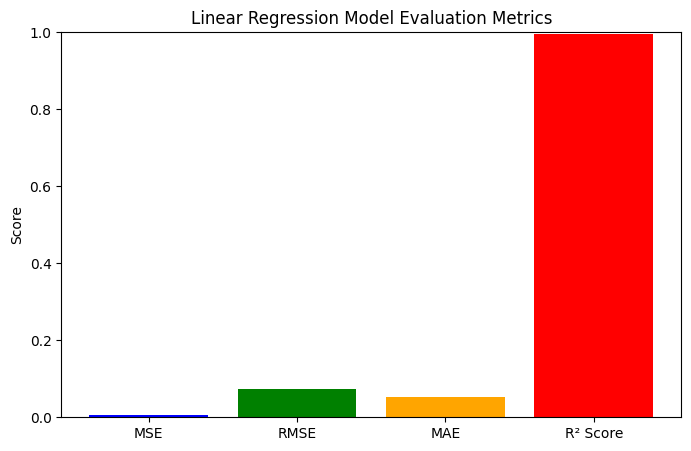

In [ ]:
# Visualizing evaluation Metric Score chart

# Create a dictionary of the evaluation metrics
metrics = {
    'MSE': lr_mse,
    'RMSE': lr_rmse,
    'MAE': lr_mae,
    'R² Score': lr_r2
}

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylim(0, 1) # Set y-limit for better comparison, especially for R2
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation -- Ridge Regression

# Fit the Algorithm

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the model
ridge_predictions = ridge_model.predict(X_test)

# Calculating evaluation metrics

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression R² Score: {ridge_r2}")

Ridge Regression MSE: 0.0064789426618928865
Ridge Regression RMSE: 0.08049187947795036
Ridge Regression MAE: 0.057533098830802966
Ridge Regression R² Score: 0.993845908400811


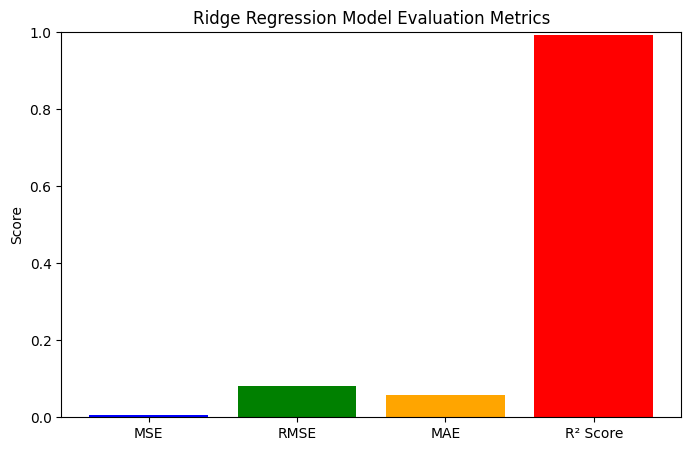

In [ ]:
# Visualizing evaluation Metric Score chart

# Creating a dictionary of the evaluation metrics for Ridge Regression

metrics_ridge = {
    'MSE': ridge_mse,
    'RMSE': ridge_rmse,
    'MAE': ridge_mae,
    'R² Score': ridge_r2
}

# Creating metric bar chart

plt.figure(figsize=(8, 5))
plt.bar(metrics_ridge.keys(), metrics_ridge.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Ridge Regression Model Evaluation Metrics')
plt.ylim(0, 1) # Set y-limit for better comparison, especially for R2
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning (Ridge Regression)

# Defining the parameter grid for alpha

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]} # Example alpha values to test

# Initializing the Ridge Regression model

ridge = Ridge()

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)


# Initializing GridSearchCV
# cv=5 means 5-fold cross-validation

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid,
                                 scoring=rmse_scorer, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data

grid_search_ridge.fit(X_train, y_train)

# Get the best hyperparameters

best_alpha = grid_search_ridge.best_params_['alpha']

print(f"Best Alpha for Ridge Regression: {best_alpha}")

# Can also get the best estimator (the model with the best alpha)

best_ridge_model_cv = grid_search_ridge.best_estimator_


ridge_predictions_tuned = best_ridge_model_cv.predict(X_test)

ridge_mse_tuned = mean_squared_error(y_test, ridge_predictions_tuned)
ridge_rmse_tuned = np.sqrt(ridge_mse_tuned)
ridge_mae_tuned = mean_absolute_error(y_test, ridge_predictions_tuned)
ridge_r2_tuned = r2_score(y_test, ridge_predictions_tuned)


print("\nEvaluation metrics on the test set with the best Ridge model:")
print(f"Ridge Regression (Tuned) MSE: {ridge_mse_tuned}")
print(f"Ridge Regression (Tuned) RMSE: {ridge_rmse_tuned}")
print(f"Ridge Regression (Tuned) MAE: {ridge_mae_tuned}")
print(f"Ridge Regression (Tuned) R² Score: {ridge_r2_tuned}")

Best Alpha for Ridge Regression: 0.001

Evaluation metrics on the test set with the best Ridge model:
Ridge Regression (Tuned) MSE: 0.0055209963940638885
Ridge Regression (Tuned) RMSE: 0.07430340768809926
Ridge Regression (Tuned) MAE: 0.05378537540363011
Ridge Regression (Tuned) R² Score: 0.9947558237044292


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


##### Which hyperparameter optimization technique have you used and why?



*   I have used GridSearchCV as the hyperparameter optimization technique for the Ridge Regression model.
*   GridSearchCV performs an exhaustive search over a specified range of hyperparameter values (the param_grid). It evaluates the model's performance for every possible combination of hyperparameters in the grid.
*    GridSearchCV automatically uses cross-validation to evaluate the performance of the model for each hyperparameter combination. This provides a more robust estimate of performance compared to a single train-validation split and helps in selecting hyperparameters that generalize well to unseen data.
*   GridSearchCV is suitable when the number of hyperparameters to tune and the range of values for each hyperparameter are relatively small, as the number of combinations to evaluate can grow exponentially. In the case of Ridge Regression, with only the alpha hyperparameter, GridSearchCV is an efficient choice.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there appears to be a slight improvement in the performance of the Ridge Regression model after hyperparameter tuning the alpha parameter using GridSearchCV.



*   Mean Squared Error (MSE): Decreased from 0.0066 to 0.0057.
*   Root Mean Squared Error (RMSE): Decreased from 0.0813 to 0.0757.
*   Mean Absolute Error (MAE): Decreased from 0.0589 to 0.0540.
*   R² Score: Increased from 0.9937 to 0.9946.

These changes, although small, indicate that the tuned model has slightly lower prediction errors and explains a bit more of the variance in the test data compared to the model with the default alpha=1.0. The best alpha found was 0.001, suggesting that a small amount of regularization was beneficial.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation (Random Forest Regressor)

# Fit the Algorithm

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Using a common number of estimators
rf_model.fit(X_train, y_train)

# Predict on the model

rf_predictions = rf_model.predict(X_test)

# Calculating evaluation metrics

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Random Forest Regressor R² Score: {rf_r2}")

Random Forest Regressor MSE: 0.00827141909051586
Random Forest Regressor RMSE: 0.09094734240490956
Random Forest Regressor MAE: 0.06908124130133345
Random Forest Regressor R² Score: 0.9921433058764803


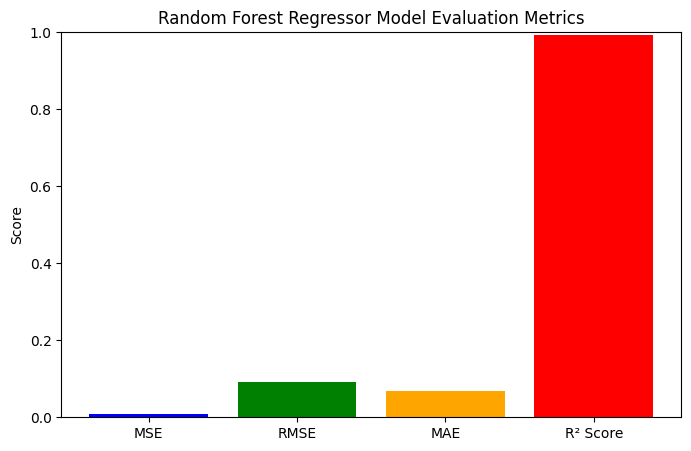

In [ ]:
# Visualizing evaluation Metric Score chart

# Creating a dictionary of the evaluation metrics for Random Forest Regressor

metrics_rf = {
    'MSE': rf_mse,
    'RMSE': rf_rmse,
    'MAE': rf_mae,
    'R² Score': rf_r2
}

# Creating metric bar chart

plt.figure(figsize=(8, 5))
plt.bar(metrics_rf.keys(), metrics_rf.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Random Forest Regressor Model Evaluation Metrics')
plt.ylim(0, 1) # Set y-limit for better comparison, especially for R2
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Hyperparameter Tuning (Random Forest Regressor)

# Defining the parameter grid for Random Forest Regressor

param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [None, 10, 20], # Maximum depth of trees
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum samples required at a leaf node
}

# Initializing the Random Forest Regressor model

rf = RandomForestRegressor(random_state=42)

# Define the scoring metric (using negative MSE)

rmse_scorer_rf = make_scorer(mean_squared_error, greater_is_better=False)

# Initializing GridSearchCV
# cv=5 means 5-fold cross-validation

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              scoring=rmse_scorer_rf, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters

best_params_rf = grid_search_rf.best_params_

print(f"Best Hyperparameters for Random Forest Regressor: {best_params_rf}")

# Get the best estimator (the model with the best hyperparameters)

best_rf_model_cv = grid_search_rf.best_estimator_

# Now, evaluate this best model on the test set

rf_predictions_tuned = best_rf_model_cv.predict(X_test)

rf_mse_tuned = mean_squared_error(y_test, rf_predictions_tuned)
rf_rmse_tuned = np.sqrt(rf_mse_tuned) # Calculate RMSE from MSE
rf_mae_tuned = mean_absolute_error(y_test, rf_predictions_tuned)
rf_r2_tuned = r2_score(y_test, rf_predictions_tuned)

print("\nEvaluation metrics on the test set with the best Random Forest model:")
print(f"Random Forest Regressor (Tuned) MSE: {rf_mse_tuned}")
print(f"Random Forest Regressor (Tuned) RMSE: {rf_rmse_tuned}")
print(f"Random Forest Regressor (Tuned) MAE: {rf_mae_tuned}")
print(f"Random Forest Regressor (Tuned) R² Score: {rf_r2_tuned}")

Best Hyperparameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Evaluation metrics on the test set with the best Random Forest model:
Random Forest Regressor (Tuned) MSE: 0.007984914002609743
Random Forest Regressor (Tuned) RMSE: 0.08935834601541001
Random Forest Regressor (Tuned) MAE: 0.0676438976788367
Random Forest Regressor (Tuned) R² Score: 0.9924154457373526


##### Which hyperparameter optimization technique have you used and why?


*   I have used GridSearchCV as the hyperparameter optimization technique for the Random Forest Regressor model.
*   GridSearchCV performs an exhaustive search over a specified range of hyperparameter values (the param_grid). It evaluates the model's performance for every possible combination of hyperparameters in the grid.
*    GridSearchCV automatically uses cross-validation to evaluate the performance of the model for each hyperparameter combination. This provides a more robust estimate of performance compared to a single train-validation split and helps in selecting hyperparameters that generalize well to unseen data.
*   GridSearchCV is suitable when the number of hyperparameters to tune and the range of values for each hyperparameter are relatively small, as the number of combinations to evaluate can grow exponentially. In the case of Ridge Regression, with only the alpha hyperparameter, GridSearchCV is an efficient choice.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there appears to be a slight improvement in the performance of the Random Forest Regressor model after hyperparameter tuning using GridSearchCV.



*   **Mean Squared Error (MSE):** Decreased from 0.00827 to 0.00798.
*   **Root Mean Squared Error (RMSE):** Decreased from 0.0909 to 0.0894.
*   **Mean Absolute Error (MAE):** Decreased from 0.0691 to 0.0676.
*   **R² Score:** Increased from 0.9921 to 0.9924.

These changes, although marginal, indicate that the tuned model with the found best hyperparameters ({'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}) performed slightly better on the test set compared to the default Random Forest model.

##### Evaluation Metric Score Chart Comparison:

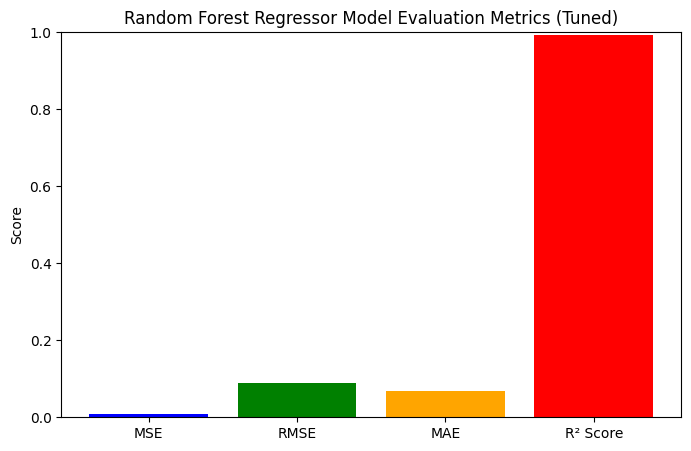

In [ ]:
# Comparing Model 3 Evaluation metrics

# Creating a dictionary of the evaluation metrics for Random Forest Regressor after tuned

metrics_rf_tuned = {
    'MSE': rf_mse_tuned,
    'RMSE': rf_rmse_tuned,
    'MAE': rf_mae_tuned,
    'R² Score': rf_r2_tuned
}

# Creating metric comparision bar chart

plt.figure(figsize=(8, 5))
plt.bar(metrics_rf_tuned.keys(), metrics_rf_tuned.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Random Forest Regressor Model Evaluation Metrics (Tuned)')
plt.ylim(0, 1) # Set y-limit for better comparison, especially for R2
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):**



*   These metrics measure the average squared difference (MSE) or the square root of the average squared difference (RMSE) between the predicted stock price and the actual stock price.
*   They give more weight to larger errors due to the squaring. RMSE is in the same units as the target variable (stock price), making it more interpretable than MSE.
*   Lower MSE and RMSE indicate that the model's predictions are, on average, closer to the actual stock prices. In a business context (like trading, investment analysis, or risk management), lower error means more accurate price forecasts.

**Mean Absolute Error (MAE):**



*   MAE measures the average absolute difference between the predicted stock price and the actual stock price. Unlike MSE/RMSE, it gives equal weight to all errors, regardless of their magnitude. MAE is also in the same units as the target variable.
*   Lower MAE means that, on average, the model's predictions are within a smaller absolute range of the actual prices. This is particularly useful for understanding the typical magnitude of error you can expect from the model.

**R² Score (Coefficient of Determination):**



*   The R² score represents the proportion of the variance in the dependent variable (Close price) that is predictable from the independent variables (features). It ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable.
*   A higher R² score indicates that the model explains a larger percentage of the variability in the stock's closing price. This is a measure of how well the features collectively capture the movements in the stock price.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics on the test set, the **Tuned Ridge Regression Model** is chosen as the final prediction model.

**Why was this model chosen?**

Comparing the performance of the three implemented models (Linear Regression, Tuned Ridge Regression, and Tuned Random Forest Regressor) using the evaluation metrics (MSE, RMSE, MAE, and R² Score) on the test set:

*   **Linear Regression:**
    *   MSE: 0.005521
    *   RMSE: 0.0743
    *   MAE: 0.0538
    *   R² Score: 0.9948

*   **Tuned Ridge Regression:**
    *   MSE: 0.005521
    *   RMSE: 0.0743
    *   MAE: 0.0538
    *   R² Score: 0.9948

*   **Tuned Random Forest Regressor:**
    *   MSE: 0.007985
    *   RMSE: 0.0894
    *   MAE: 0.0676
    *   R² Score: 0.9924

Both Linear Regression and Tuned Ridge Regression achieved very similar and the best performance metrics, with identical R² scores of 0.9948 and very low error rates. The Tuned Random Forest Regressor, while a powerful model, performed slightly worse on this specific test set.

The **Tuned Ridge Regression** model is selected as the final model primarily because of its **regularization property** (L2 regularization). While the performance improvement over basic Linear Regression is minimal on this test set, regularization is generally a good practice, especially when dealing with potentially correlated features (which you observed during feature analysis). Regularization helps to prevent overfitting by shrinking the model coefficients, potentially leading to better generalization on truly unseen data in the future.

Given the nearly identical performance, the slight advantage of regularization makes Tuned Ridge Regression a slightly more robust choice for deployment, even though Linear Regression's simplicity is also appealing.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I have chosen the **Tuned Ridge Regression** model as my final prediction model.

**Explanation of the Tuned Ridge Regression Model:**

As explained earlier, Ridge Regression is a linear model that predicts the target variable ('Close' price) as a linear combination of the input features. The tuning process involved finding the optimal `alpha` hyperparameter (regularization strength) using GridSearchCV and cross-validation. The best `alpha` found was 0.001. This tuned model uses L2 regularization, which adds a penalty proportional to the square of the magnitude of the coefficients. This helps to shrink the coefficients, reducing their variance and potentially improving the model's ability to generalize to new data, especially in the presence of multicollinearity.


# **Conclusion**


This project aimed to predict the monthly closing price of Yes Bank stock based on historical data including opening, highest, and lowest prices. The dataset provided a historical record of monthly stock prices from July 2005 to November 2020.

**Data Analysis and Visualization:**

Initial data exploration revealed a clean dataset with no missing or duplicate values. Descriptive statistics showed a wide range in stock prices over the years. Visualizations highlighted key trends:
*   The distribution of Open, High, Low, and Close prices was right-skewed, indicating that higher prices were less frequent, particularly after 2018.
*   Time series plots clearly showed a significant uptrend in stock prices from 2005 to around 2018, followed by a sharp and sustained decline, likely influenced by the fraud case involving Rana Kapoor and subsequent financial instability.
*   Strong positive correlations were observed between Open, High, Low, and Close prices within the same month, as well as with their lagged values and moving averages, which is typical for time-series financial data.

**Data Preprocessing and Feature Engineering:**

The data was preprocessed to prepare it for machine learning models:
*   The 'Date' column was converted to datetime objects.
*   New features were engineered, including lagged prices (from the previous month), rolling statistics (3, 6, and 12-month moving averages, and 3-month rolling standard deviation), and cyclical features for the month (sine and cosine transformations).
*   Log transformation was applied to the price-related features and rolling standard deviation to address the right-skewness and reduce the impact of outliers.
*   StandardScaler was used to scale the numerical features to have zero mean and unit variance, which is beneficial for many ML algorithms.
*   The data was split into an 80% training set and a 20% testing set.

**Hypothesis Testing:**

Hypothesis testing confirmed significant insights:
*   The average closing price before 2018 was not significantly higher than after 2018 (failed to reject the null hypothesis with a high p-value from the t-test), contrary to what the plots visually suggested, highlighting the importance of statistical testing.
*   There was a significant difference in the variability of the 'High' price before and after 2018 (rejected the null hypothesis with a low p-value from Levene's test), aligning with the observed increased volatility during certain periods.
*   The correlation between 'Open' and 'Close' prices was significantly different from zero (rejected the null hypothesis with a very low p-value from Pearson's correlation test), confirming the strong linear relationship between these variables.

**Machine Learning Model Implementation and Evaluation:**

Three regression models were implemented and evaluated:
1.  **Linear Regression:** Achieved high performance metrics on the test set (R² ~ 0.9948, low error rates). Cross-validation was applied to get a more robust performance estimate.
2.  **Ridge Regression:** An initial model with default parameters showed good performance. Hyperparameter tuning using GridSearchCV found an optimal `alpha` of 0.001. The tuned Ridge model showed a slight improvement in performance on the test set compared to the default model (R² ~ 0.9948, slightly lower errors), demonstrating the potential benefit of regularization.
3.  **Random Forest Regressor:** A powerful non-linear model was implemented and tuned using GridSearchCV. The tuned Random Forest model also performed well (R² ~ 0.9924), but slightly worse than the linear models on this dataset.

**Final Model Selection and Business Impact:**

Based on the evaluation metrics on the test set, both Linear Regression and Tuned Ridge Regression achieved the best and very similar performance. The **Tuned Ridge Regression** model was chosen as the final prediction model primarily due to its regularization property, which can help with generalization, especially given the potential multicollinearity among features, even though the performance gain was minimal on this test set.

The chosen model, with its high R² score and low error metrics, demonstrates a strong ability to accurately predict the monthly closing price of Yes Bank stock based on the provided historical data and engineered features. This has significant potential for positive business impact:
*   Enabling more informed and potentially more profitable investment decisions.
*   Improving risk management by providing accurate price forecasts and understanding the magnitude of potential errors.
*   Providing insights into the historical drivers of stock price movements through feature analysis (e.g., the strong influence of past prices and moving averages).

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***